<a href="https://colab.research.google.com/github/vlochub/MIT-Xpro-colab/blob/main/Assignment_20_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration of word embeddings

In this notebook, examine trained word embeddings, and explore word similarities.

In [ ]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 78.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.2/38.2 MB 16.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.16.2
    Uninstalling scipy-1.16.2:
      Successfully uninstalled scipy-1.16.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [ ]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [ ]:
model.most_similar("tasty", topn=20)

[('delicious', 0.9297149181365967),
 ('savory', 0.8507497310638428),
 ('flavorful', 0.8387422561645508),
 ('salads', 0.8235515356063843),
 ('desserts', 0.8179685473442078),
 ('delectable', 0.8080906271934509),
 ('spicy', 0.8030831813812256),
 ('dishes', 0.795765221118927),
 ('baked', 0.7874633073806763),
 ('dessert', 0.7854619026184082),
 ('soups', 0.7726259827613831),
 ('nutritious', 0.7647512555122375),
 ('cakes', 0.7578096985816956),
 ('entree', 0.756751537322998),
 ('seafood', 0.7560290098190308),
 ('scrumptious', 0.7541993856430054),
 ('veggies', 0.7524521946907043),
 ('sandwiches', 0.7519668340682983),
 ('healthful', 0.7512376308441162),
 ('meal', 0.7432385087013245)]

Find the cosine similarity between two words

In [ ]:
model.similarity("good", "bad")

0.79648936

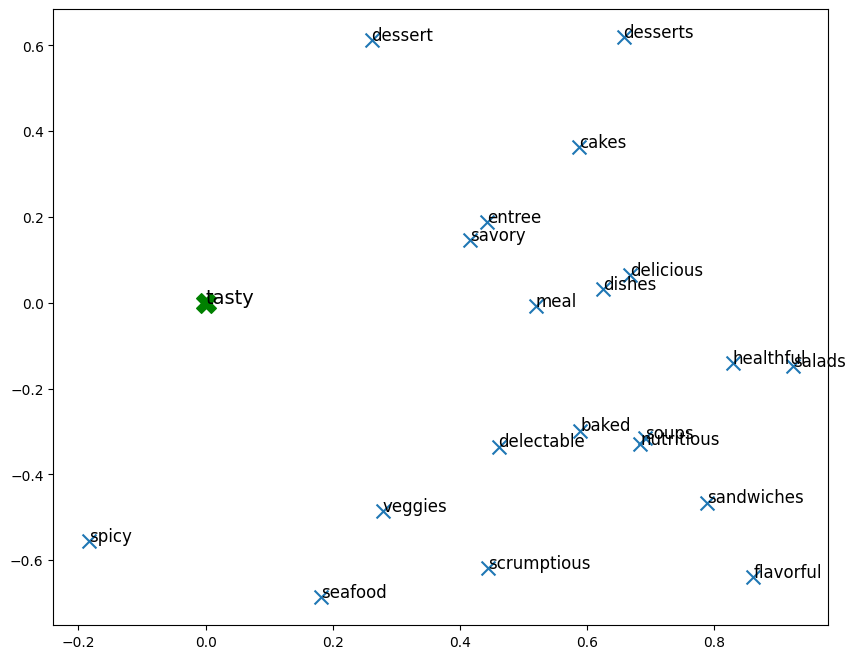

In [ ]:
import matplotlib.pyplot as plt

word = 'tasty'
similar_words = model.similar_by_word(word, topn=20)

# extract the vectors for the similar words
similar_word_vectors = [model[word] for word, similarity in similar_words]

# plot the vectors on a 2D graph
x = [vector[0] for vector in similar_word_vectors]
y = [vector[1] for vector in similar_word_vectors]
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(x, y, marker='x', s=100) # set marker as 'x' and increase size to 100

# add labels for the similar words
for i, word_similarity in enumerate(similar_words):
    word, similarity = word_similarity
    ax.annotate(word, (x[i], y[i]), size=12) # increase size of the word labels to 12

# add the original word at origin
word = 'tasty'
ax.scatter(0, 0, marker='X', s=200, color='green')
ax.annotate(word, (0, 0), size=14)

# show the plot
plt.show()